In [91]:
# System.
import datetime

# Data manipulation.
import pandas as pd
import numpy as np
import math

# Plotting.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [92]:
# Matplotlib params.
mpl.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.linestyle': '--',
    'grid.color': 'lightgray',
    'font.size': 12,
    'legend.frameon': False,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

CYAN = "#03adfc"      
FANTA = "#ff9800" 

In [93]:
# Load data.
p = "/Users/jakecordery/Desktop/dissertation-york/data/raw/covid_confirmed_usafacts.csv"
df = pd.read_csv(p)

In [94]:
df1 = df[df['County Name'] == 'Statewide Unallocated']
df.head(10)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
6,1011,Bullock County,AL,1,0,0,0,0,0,0,...,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057
7,1013,Butler County,AL,1,0,0,0,0,0,0,...,6617,6617,6617,6617,6617,6617,6617,6617,6617,6617
8,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,41931,41931,41931,41931,41931,41931,41931,41931,41931,41931
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,10935,10935,10935,10935,10935,10935,10935,10935,10935,10935


In [95]:
print(f"Columns in the dataframe: {df.columns[4], df.columns[-1]}")
print(len(df.columns[4:]))

Columns in the dataframe: ('2020-01-22', '2023-07-23')
1265


In [96]:
# Load data.
p = "/Users/jakecordery/Desktop/dissertation-york/data/raw/covid_confirmed_usafacts.csv"
df = pd.read_csv(p)

# Drop incomplete data.
df = df[df['County Name'] != 'Statewide Unallocated']
df= df.drop('StateFIPS', axis=1).reset_index()

print(df.head(2))
print(len(df)) # 3142 counties.

   index  countyFIPS      County Name State  2020-01-22  2020-01-23  \
0      1        1001  Autauga County     AL           0           0   
1      2        1003  Baldwin County     AL           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2023-07-14  \
0           0           0           0           0  ...       19913   
1           0           0           0           0  ...       70521   

   2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
0       19913       19913       19913       19913       19913       19913   
1       70521       70521       70521       70521       70521       70521   

   2023-07-21  2023-07-22  2023-07-23  
0       19913       19913       19913  
1       70521       70521       70521  

[2 rows x 1269 columns]
3142


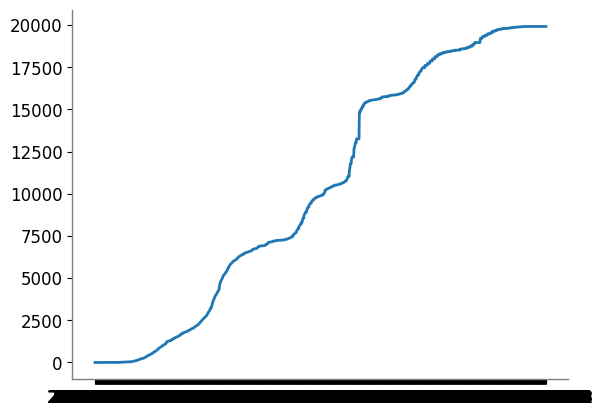

In [97]:
ts = df.iloc[0, :][4:]
plt.plot(ts.index, ts.values)
plt.show()

In [98]:
print(f"Columns in the dataframe: {list(df.columns)}")

Columns in the dataframe: ['index', 'countyFIPS', 'County Name', 'State', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2

In [99]:
class DfInfo:
    def __init__(self, df, initial=False):
        self.df = df
        self.ID_COLS = ['countyFIPS', 'County Name', 'State'] # Save these to add back in after splitting and scaling.
        self.NUMERIC_COLS = [col for col in self.df.columns if col not in self.ID_COLS]
        self.NUMERIC_COLS = sorted(self.NUMERIC_COLS, key=lambda x: pd.to_datetime(x, errors='coerce'))

        # Remove the first and last 6th of the dates because they are mostly just 0s (no daily change).
        # States either didn't report cases daily or stopped entirely.
        num_dates = len(self.NUMERIC_COLS)
        new_start = num_dates // 6
        new_end = num_dates - new_start

        if initial:
            self.NUMERIC_COLS = self.NUMERIC_COLS[new_start:new_end]

In [100]:
# Remove unwanted dates from dataframe.
dfinfo = DfInfo(df=df, initial=True)
print(len(df.T))
cols = dfinfo.ID_COLS + dfinfo.NUMERIC_COLS 
df = df[cols]
print(len(df.T))
print(1269 - 1269//3)

1269
847
846


In [101]:
print(f"total nans in dataframe: {df.isna().sum().sum()}")

total nans in dataframe: 0


In [102]:
# Split the dataset into train, validation and test OR N folds.
def split_df(df, folds=None):
    if folds is None:
        # Drop nan rows in the non_date_cols.
        df = df.dropna(axis=0, subset=dfinfo.ID_COLS)

        date_cols = [col for col in df.columns if col not in dfinfo.ID_COLS]
        date_cols_sorted = sorted(date_cols, key=lambda x: pd.to_datetime(x, errors='coerce'))

        # 75:10:15 train:val:test split.
        total_cols = len(date_cols_sorted)
        i1, i2 = int(total_cols * 0.75), int(total_cols * 0.85)
        
        # Create training, validation, and test date columns
        train_dates = date_cols_sorted[:i1]
        val_dates = date_cols_sorted[i1:i2]
        test_dates = date_cols_sorted[i2:]
        
        # Create DataFrames with all columns for reference
        trcols = dfinfo.ID_COLS + date_cols_sorted[:i1]
        
        # For validation and test, keep ALL preceding date columns too, for proper modeling context
        valcols = dfinfo.ID_COLS + date_cols_sorted[i1:i2]  # includes training dates 
        tscols = dfinfo.ID_COLS + date_cols_sorted[i2:]  # includes all dates
        
        dftrain = df[trcols]
        dfval = df[valcols]
        dftest = df[tscols]
        return dftrain, dfval, dftest, train_dates, val_dates, test_dates

        
    else: # split data into N folds.
        # Drop nan rows in the non_date_cols.
        df = df.dropna(axis=0, subset=dfinfo.ID_COLS)

        date_cols = [col for col in df.columns if col not in dfinfo.ID_COLS]
        date_cols_sorted = sorted(date_cols, key=lambda x: pd.to_datetime(x, errors='coerce'))

        # N fold split.
        total_cols = len(date_cols_sorted)
        fold_len = total_cols // folds
        
        # Create training, validation, and test date columns
        folded_dfs = []
        for fold in range(folds): # May need -1.
            dates = date_cols_sorted[fold*fold_len:(fold+1)*fold_len]
            cols = dfinfo.ID_COLS + dates # Add identifier columns.
            dffold = df[cols]
            folded_dfs.append(dffold)
        return folded_dfs
    

dftrain, dfval, dftest, train_dates, val_dates, test_dates = split_df(df)
print(f"Train dates: {train_dates[0]}-{train_dates[-1]}\nVal dates: {val_dates[0]}-{val_dates[-1]}\nTest dates: {test_dates[0]}-{test_dates[-1]}")

Train dates: 2020-08-19-2022-05-13
Val dates: 2022-05-14-2022-08-05
Test dates: 2022-08-06-2022-12-10


In [103]:
df_folds = split_df(df, folds=5)
for f in df_folds:
    print(f.columns[4], f.columns[-1])

2020-08-20 2021-02-02
2021-02-04 2021-07-20
2021-07-22 2022-01-04
2022-01-06 2022-06-21
2022-06-23 2022-12-06


In [104]:
print(len(train_dates))
print(len(val_dates))
print(len(test_dates))

633
84
127


In [105]:
print(f"nans in train dataframe: {dftrain.isna().sum().sum()}")
print(f"nans in validation dataframe: {dfval.isna().sum().sum()}")
print(f"nans in test dataframe: {dftest.isna().sum().sum()}")

nans in train dataframe: 0
nans in validation dataframe: 0
nans in test dataframe: 0


In [106]:
def display_mean_dist(ax, df, n=False):
    df_plot = df.drop(dfinfo.ID_COLS, axis=1)
    meandf = df_plot.mean(axis=0)
    data = meandf.to_numpy()
    
    ax.plot(np.arange(0, data.shape[0], 1), data, color='#90c3e2', linewidth=1)
    ax.set_xlabel('Day')
    if n:
        ax.set_ylabel('Scaled Case Number')
    else:
        ax.set_ylabel('Case Number')
    #ax.set_title(title)
    ax.grid(True, which='both', linestyle='-', linewidth=1, color='lightgray')
    ax.tick_params(direction='out', length=6, width=1, colors='gray')
    ax.set_xlim(0, data.shape[0])
    return ax

In [107]:
def make_daily(df):
    # Extract cumulative counts as a numpy array.
    cumulative_counts = df[dfinfo.NUMERIC_COLS].values

    # Compute daily differences along each row (county).
    daily_diff = np.diff(cumulative_counts, axis=1)  # One fewer column than cumulative.
    daily_cases = daily_diff.copy()
    daily_cases[daily_cases < 0] = 0  # Ensure no negative daily cases from error.
    dfinfo.NUMERIC_COLS = dfinfo.NUMERIC_COLS[1:]

    # Create county-level daily dataframe.
    df_daily = df[dfinfo.ID_COLS].copy()
    df_daily = pd.concat([df_daily, pd.DataFrame(daily_cases, columns=dfinfo.NUMERIC_COLS)], axis=1)
    return df_daily

In [108]:
def apply_rolling_av(df):
    # Row-wise operation, replace the current day's data with the [current:current+7] day's average of data.
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].T.rolling(window=7, min_periods=1).mean().T
    return df

In [109]:
def interpolate_df(df):
    # Transpose, interpolate (so that each date column is filled column-wise), then transpose back.
    # Interpolate missing values along the date axis for each county.
    #df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS]
    df.replace(0, np.nan, inplace=True)

    # Forward fill to handle leading NaNs.
    #df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="linear", axis=1, limit_direction='both').ffill(axis=1).bfill(axis=1)
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')

    # Now, column wise since some are missed!
    #df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="nearest", axis=1).ffill(axis=0).bfill(axis=0)

    # Check to ensure no NaNs remain.
    if df[dfinfo.NUMERIC_COLS].isnull().values.any():
        raise ValueError("There are still missing values in the DataFrame after interpolation and filling.")
    
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans before rolling average daily : {nan_count_per_column}")
    df = apply_rolling_av(df)
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans after rolling average : {nan_count_per_column}")

    # Now interpolate days where states clearly only uploaded n times a week.
    df[df[dfinfo.NUMERIC_COLS] == 0] = np.nan
    #df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="linear", axis=1).ffill(axis=0).bfill(axis=0)
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')

    return df

In [110]:
def display_plotsf(df1, df2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    display_mean_dist(ax[0], df1)#, title='Before scaling')
    display_mean_dist(ax[1], df2, n=True)#, title='After Scaling')
    plt.tight_layout()
    plt.savefig('/Users/jakecordery/Desktop/dissertation-york/figures/data.png', dpi=500)
    plt.show()

In [111]:
def display_statesf(df, label='State'):
    if label == 'State':
        df = df.drop(columns=['countyFIPS', 'County Name'])
        df = df.groupby('State').mean().reset_index()
    else:
        df = df.drop(columns=['County Name', 'State'])

    non_date_cols = [label]
    # date_cols now holds only columns with numeric (date) values
    date_cols = [col for col in df.columns if col not in non_date_cols]

    # Determine the number of rows and cols <- sqrt(counties).
    n_states = df.shape[0]
    n_rows = int(math.sqrt(n_states) + 1)
    n_cols = n_rows
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 12), sharex=True)

    if n_states == 1:
        axes = [axes]
        
    # Flatten axes array for easier indexing.
    axes = axes.flatten()

    # Plot each state's data in a subplot.
    for idx, (_, row) in enumerate(df.iterrows()):
        ax = axes[idx]
        ax.plot(np.arange(len(date_cols)), row[date_cols].values, color=FANTA, linewidth=0.5)
        ax.set_title(row[label])

    # Remove any unused subplots.
    for ax in axes[n_states:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

In [112]:
#display_statesf(df1)

In [113]:
def process_df(df, display_plots=True, train=False, display_states=True, display_counties=False):
    # Translate the cumulative case numbers into daily new cases.
    nan_count_per_column = df.isnull().sum().sum()
    print(f"zero count {df[df == 0].sum().sum()}")
    print(f"initial nan count: {nan_count_per_column}")
    df = make_daily(df)
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans after daily : {nan_count_per_column}")

    # Interpolate missing values along the date axis for each county.
    # Also runs a seven day rolling average.
    df_original = df.copy()
    df = interpolate_df(df)
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans after interpolation : {nan_count_per_column}")

    # Scale the data column-wise (i.e. by date) via natural logarithm.
    logscale = lambda x: np.log(x + 1e-3) # + small constant stops ln(0).

    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].apply(logscale, axis=1)
    
    # Scale between 0 and 1 to account for population number.
    unitscale = lambda x: (x - x.min()) / (x.max() - x.min())

    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].apply(unitscale, axis=1)
    df_unit = df.copy() # Save copy for plotting.

    nan_count_per_column = df.isnull().sum().sum()
    print(f"Final nan count: {nan_count_per_column}")

    if display_plots:
        display_plotsf(df_original, df_unit)

    if display_states:
        display_statesf(df)  

    if display_counties:     
        display_statesf(df, label='countyFIPS')

    return df

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


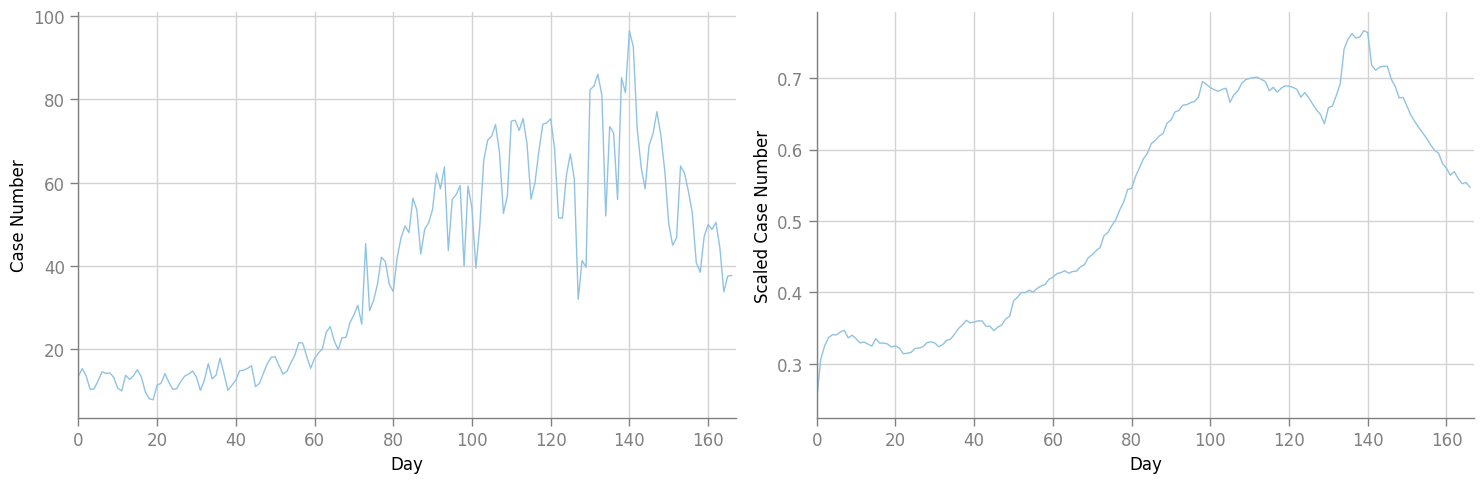

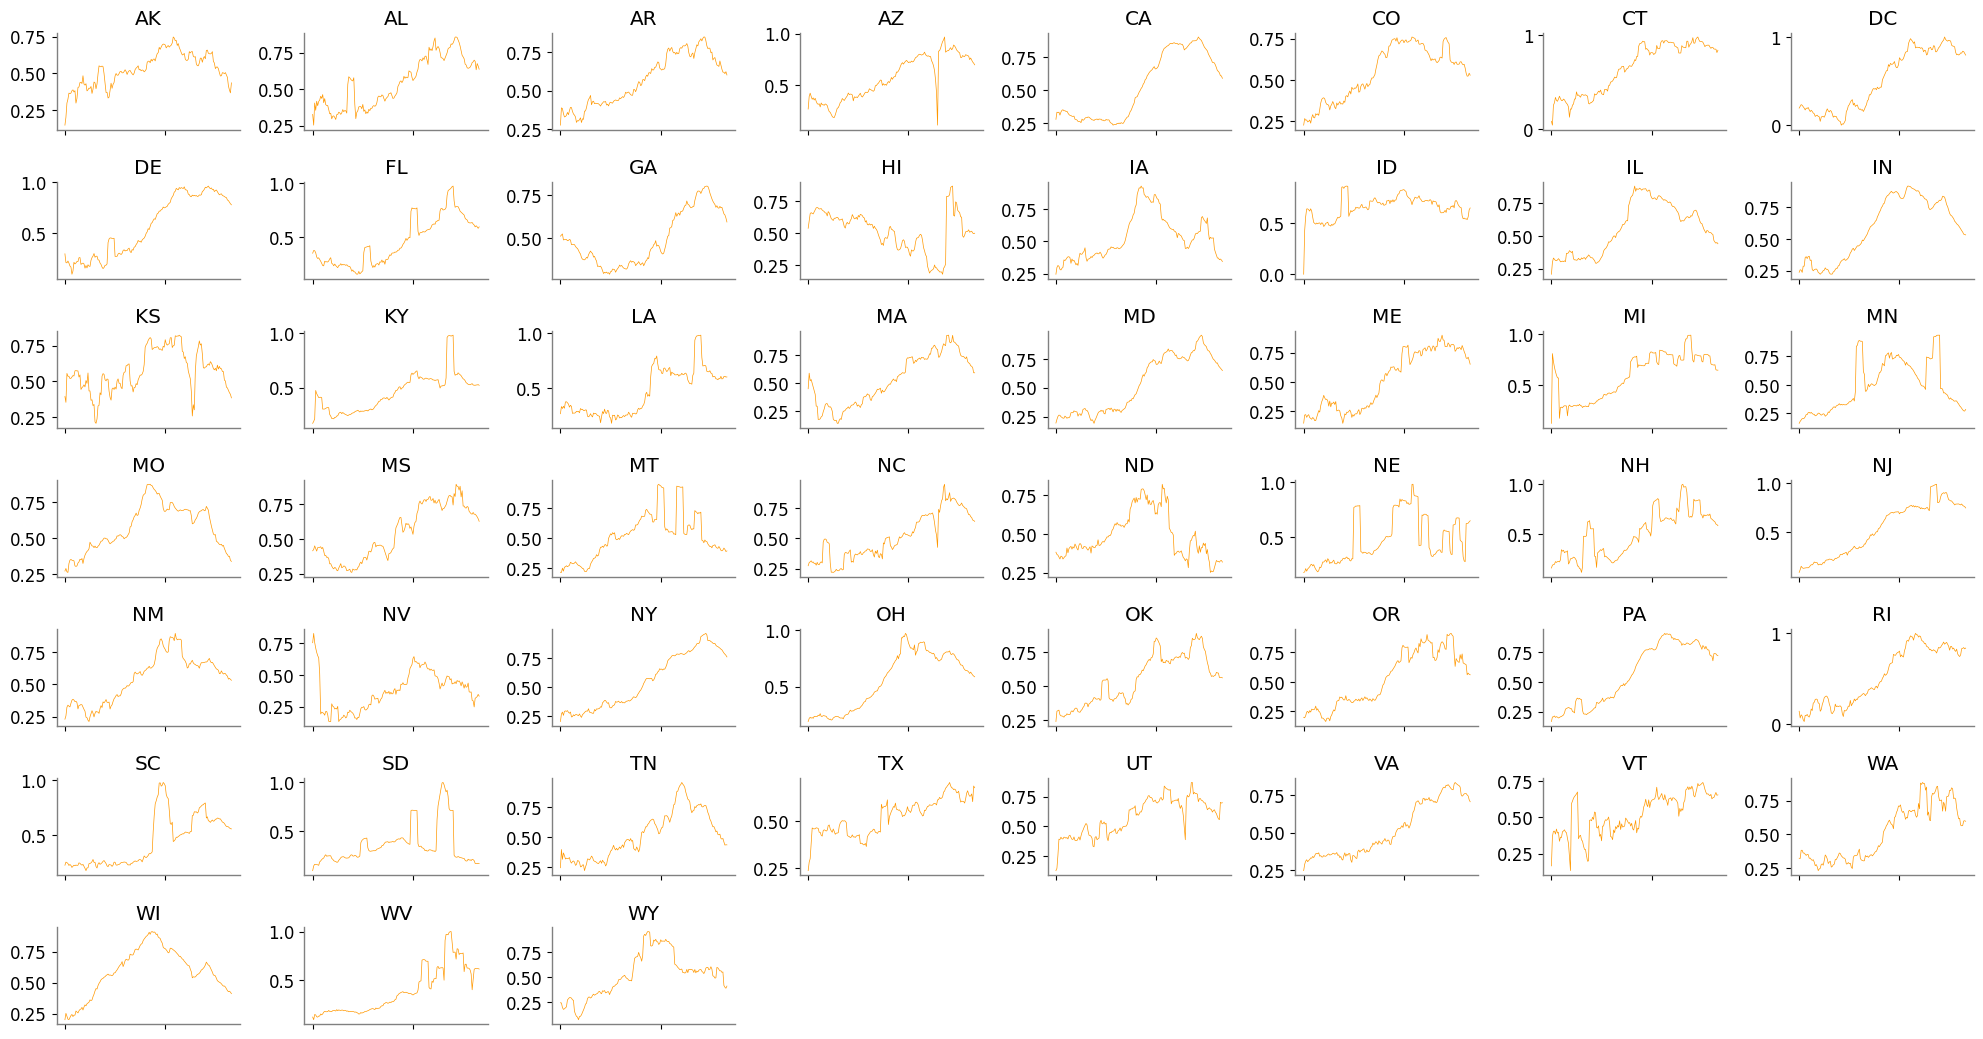

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


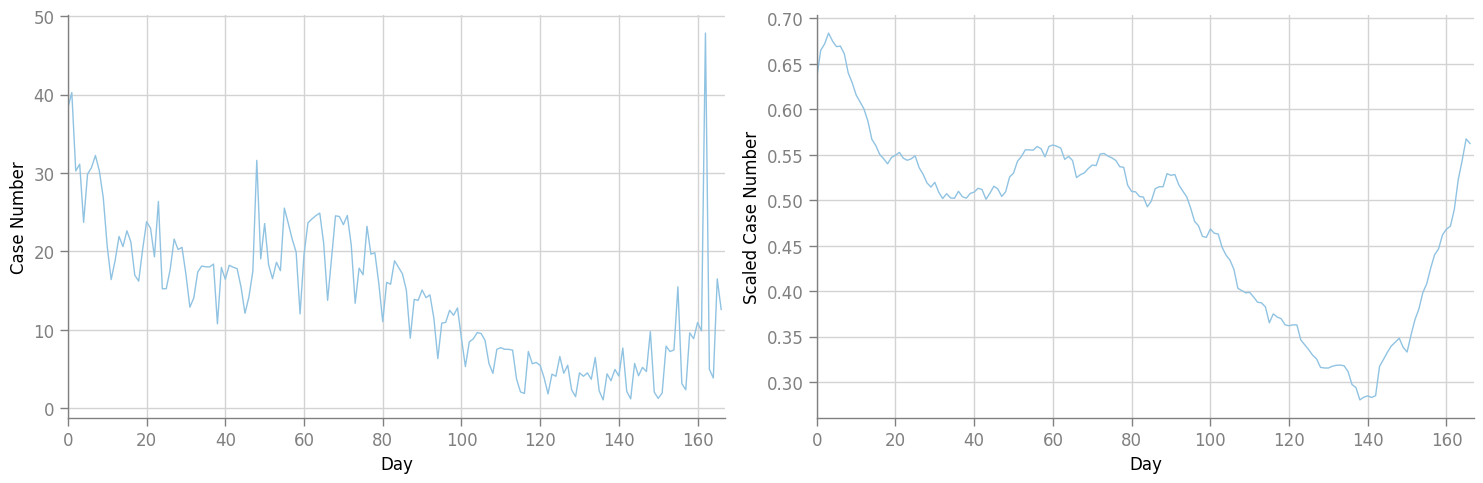

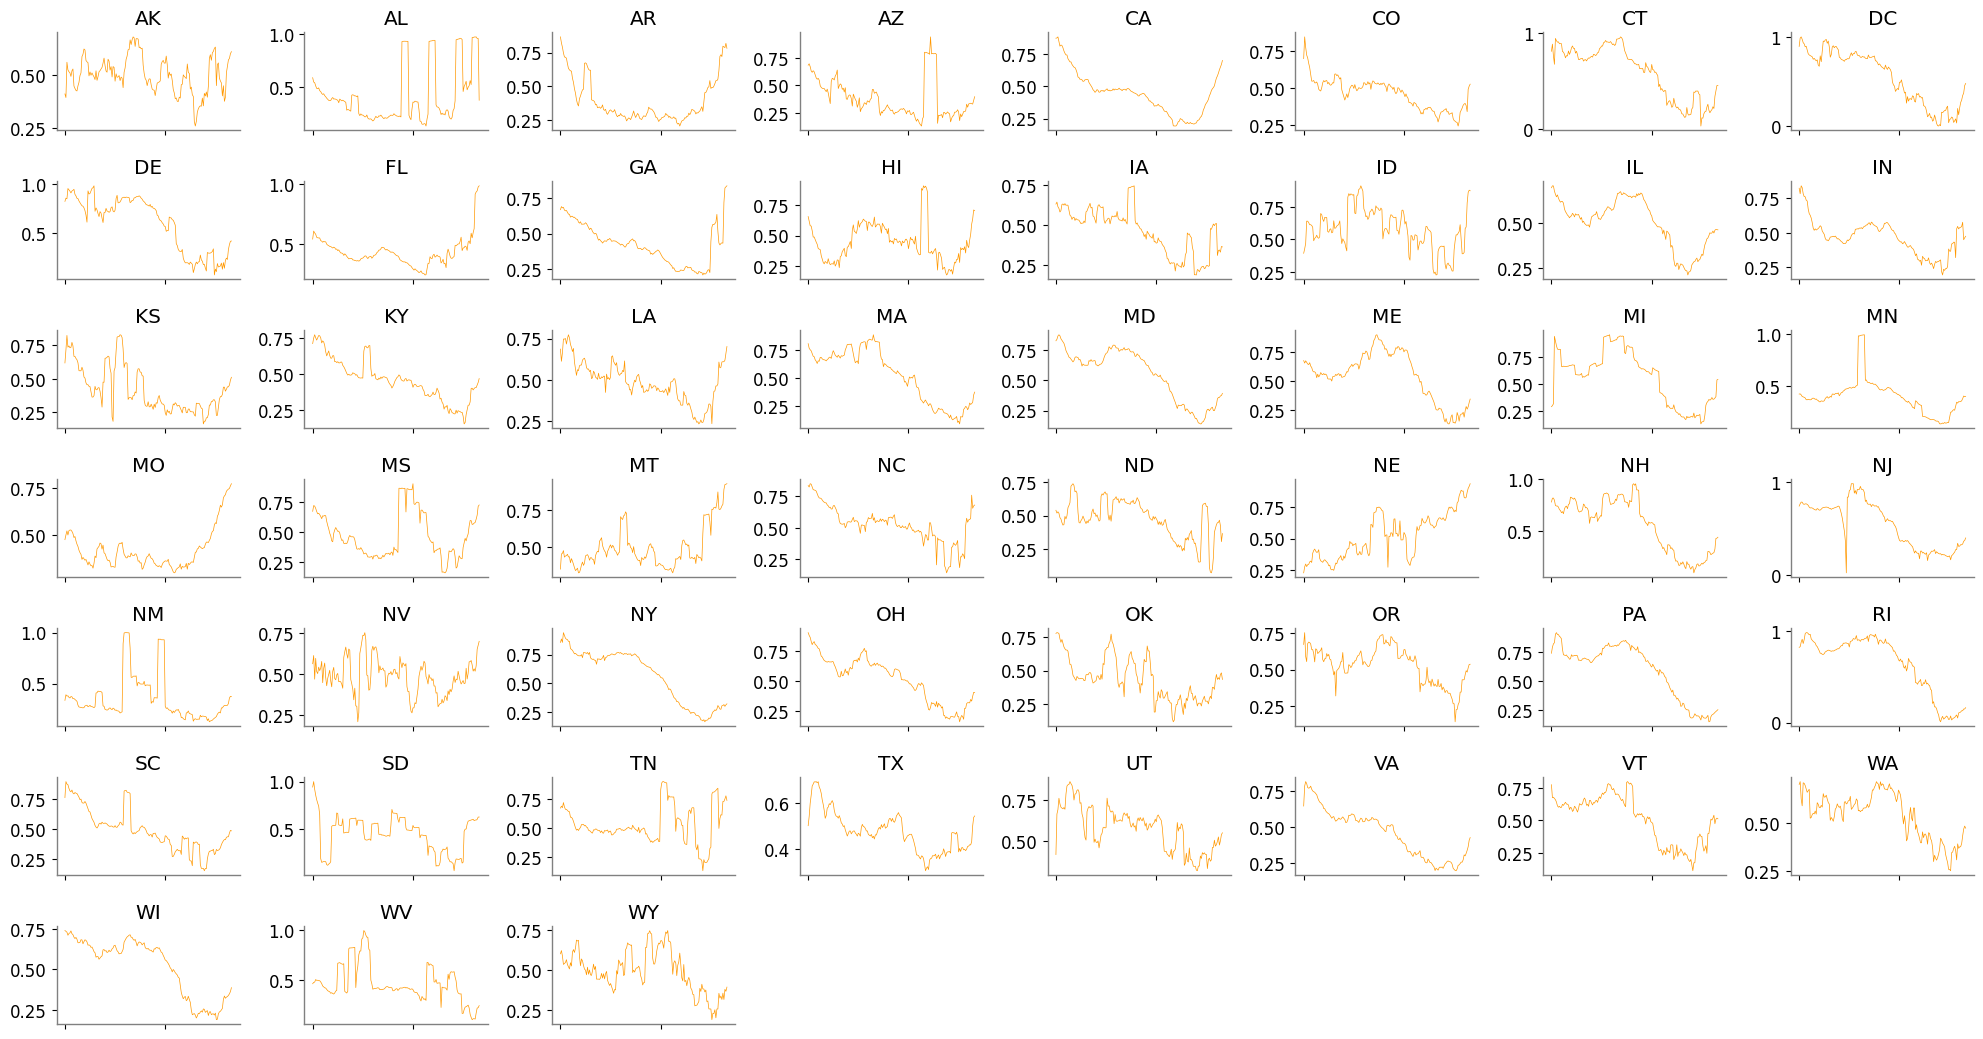

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


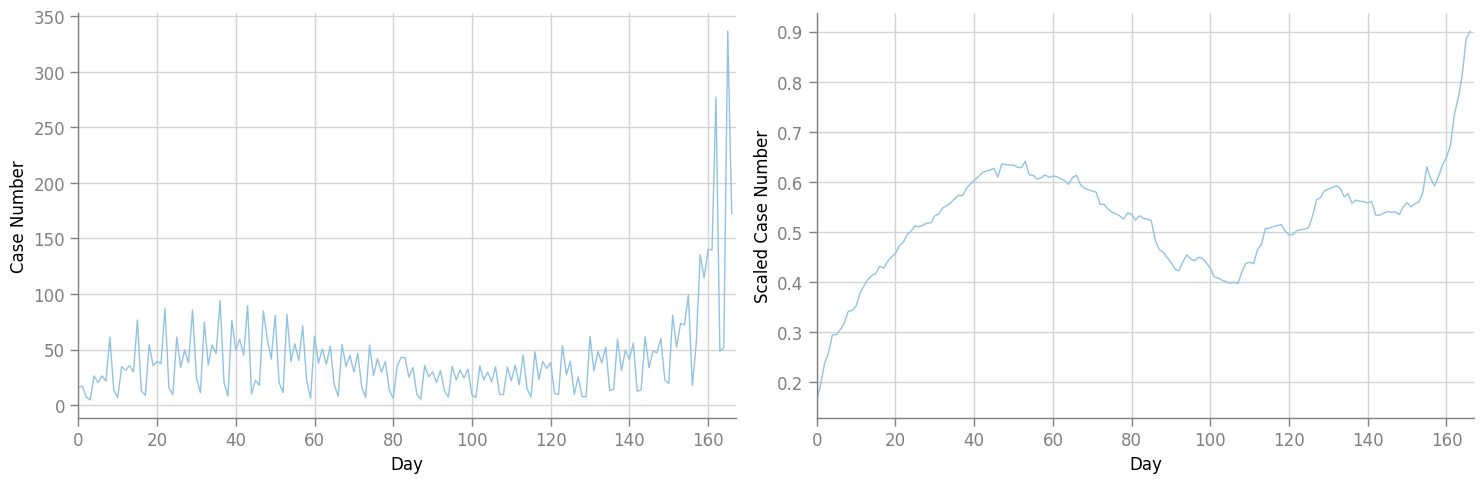

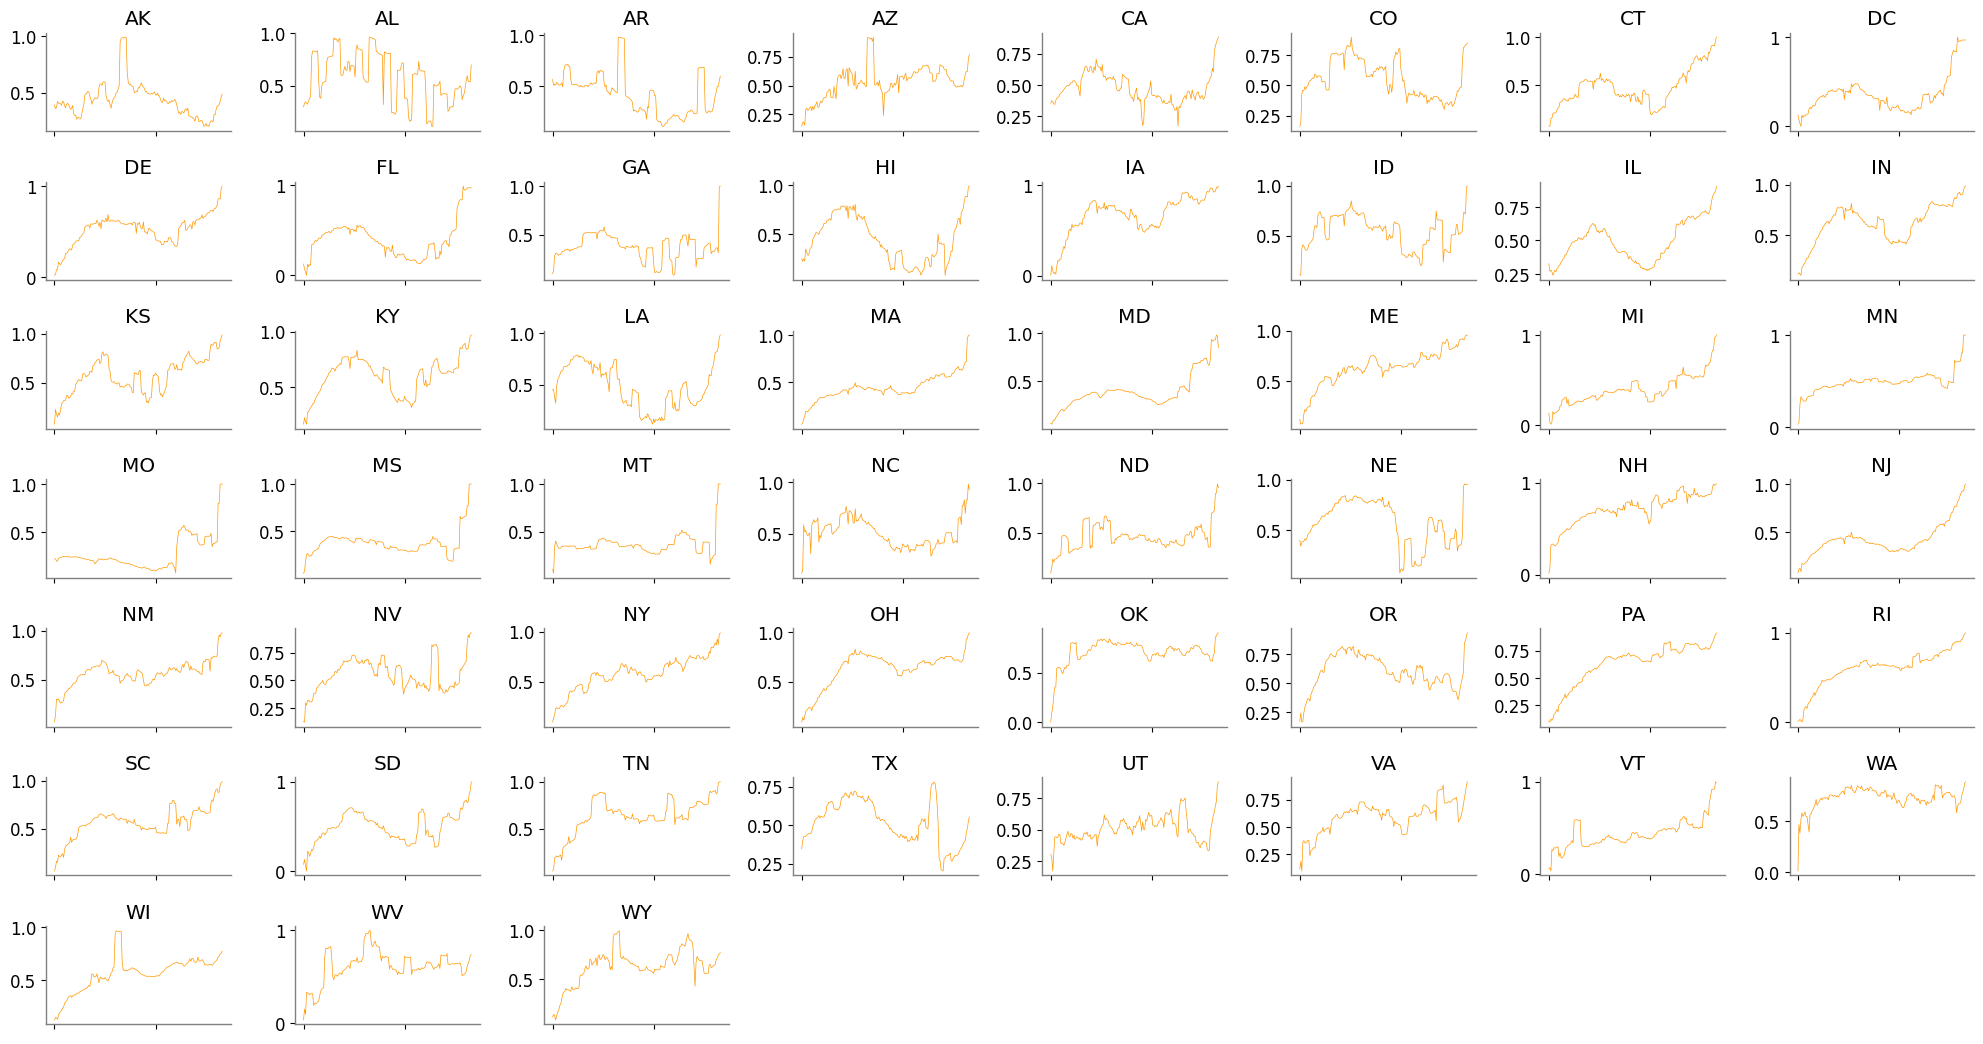

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


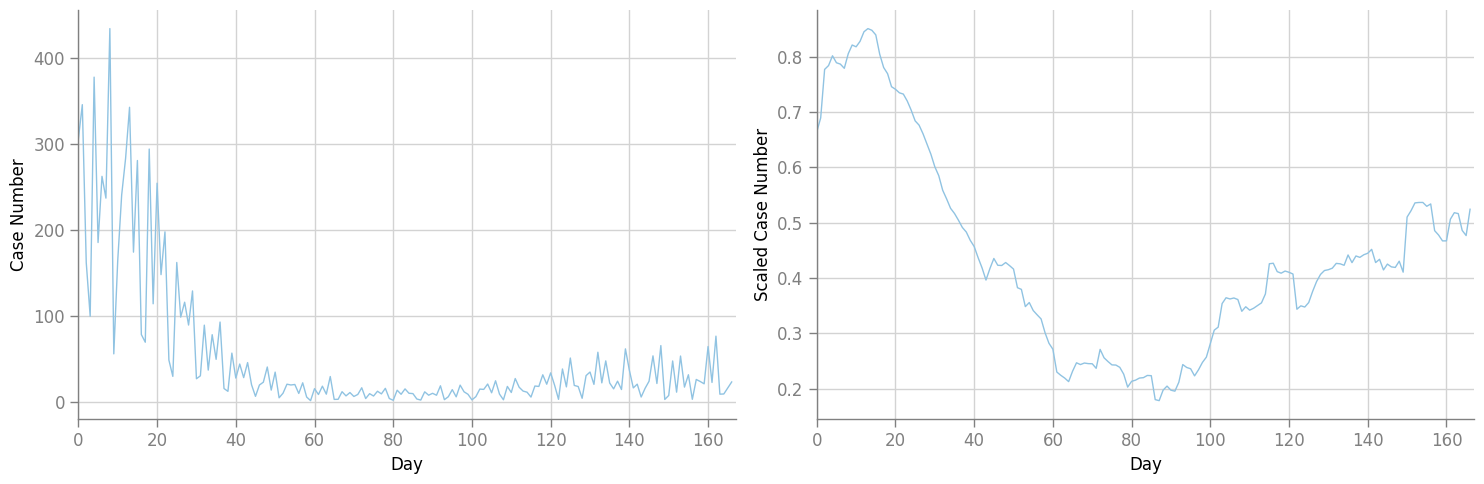

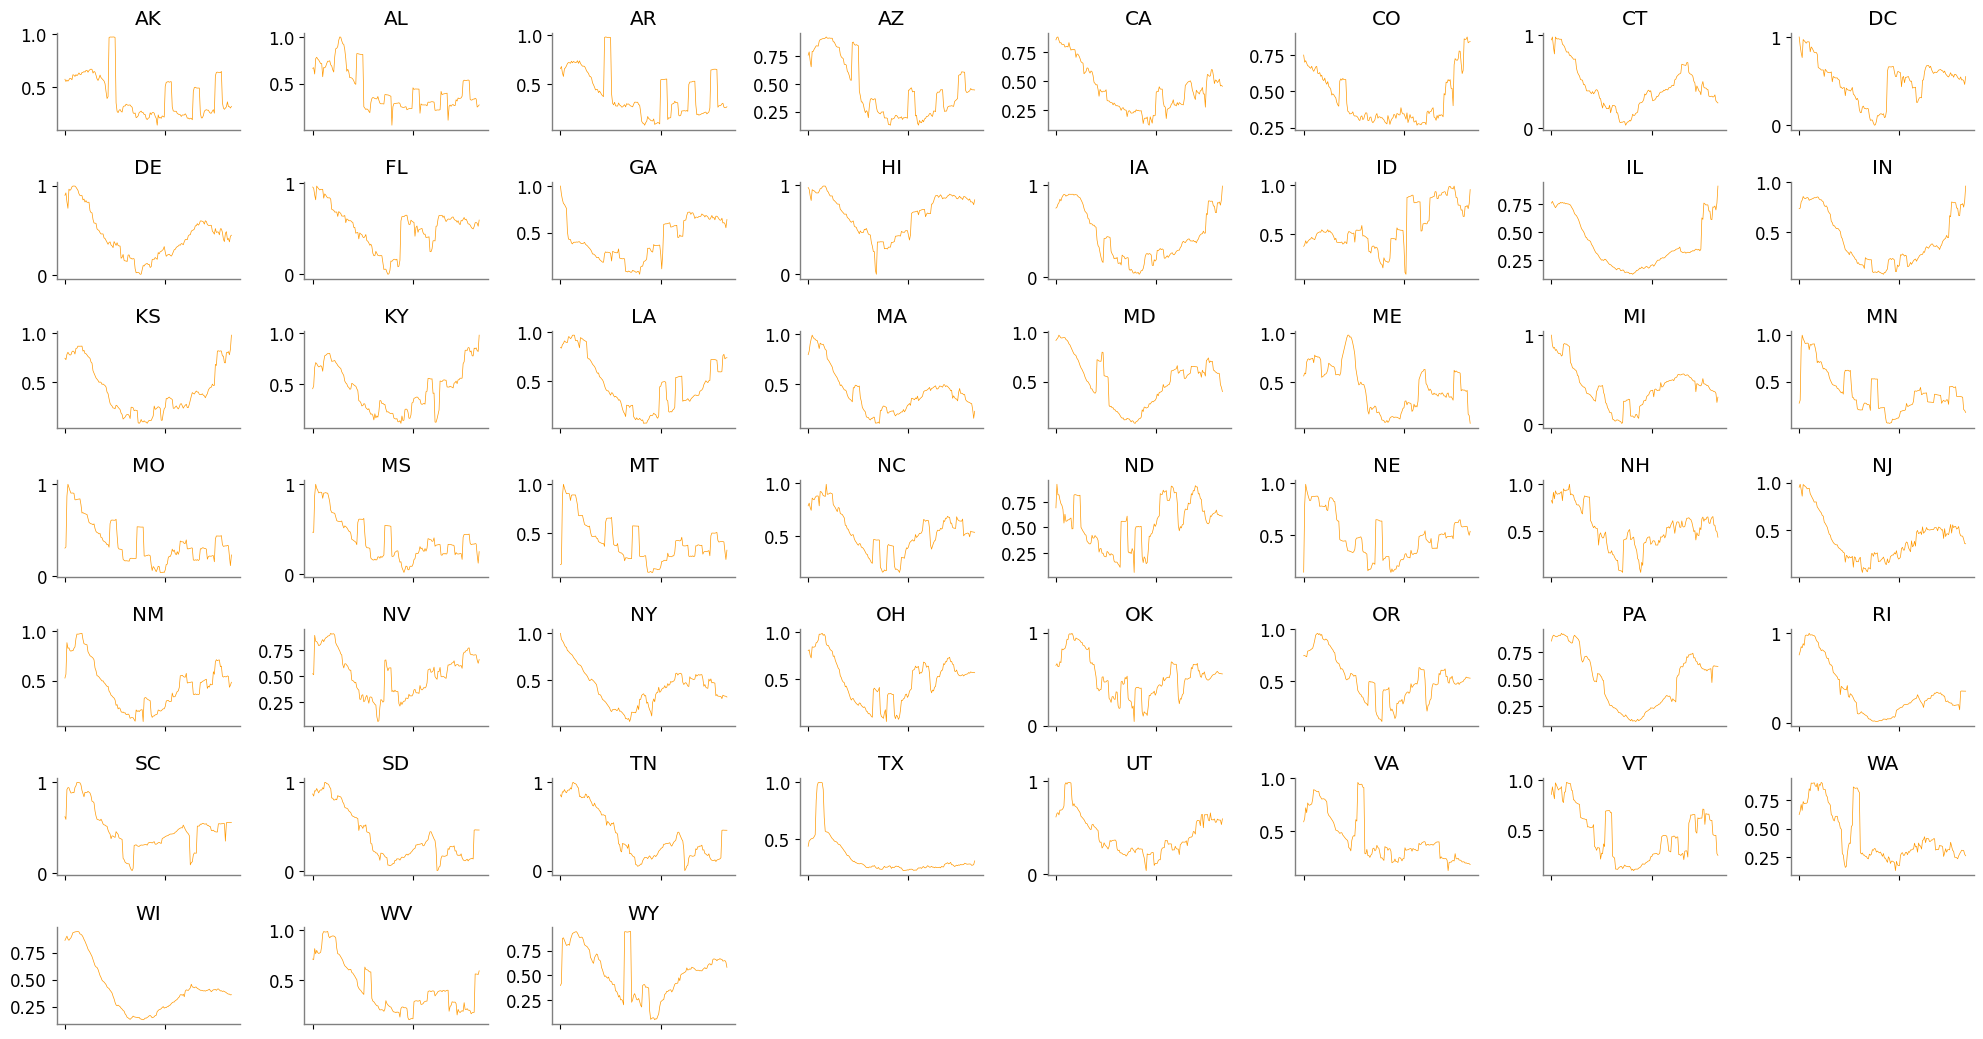

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


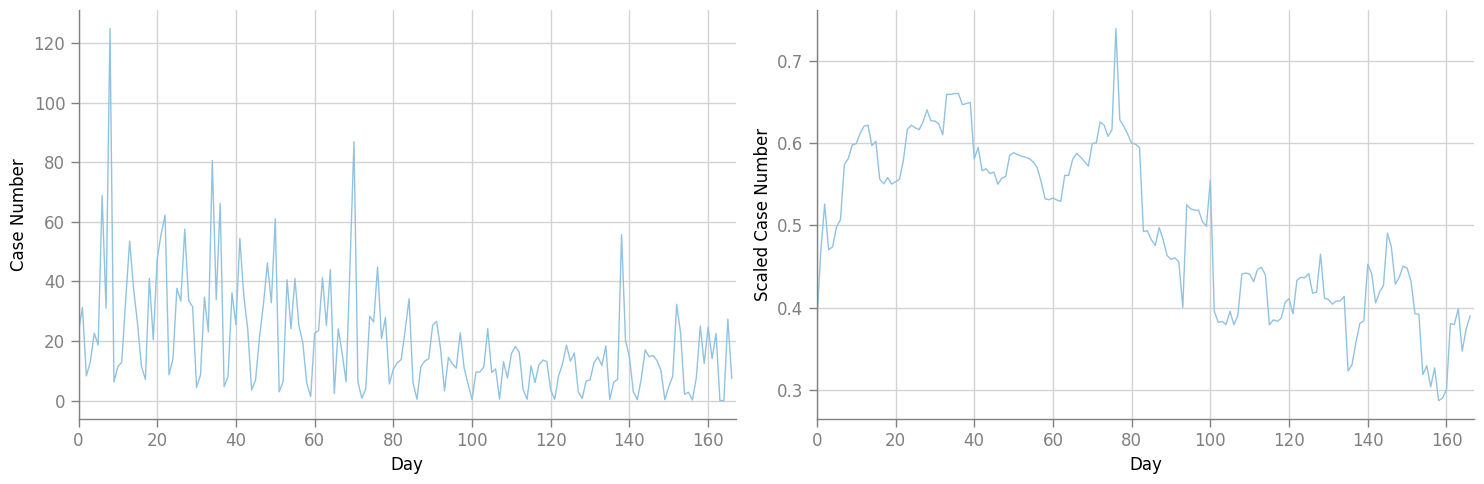

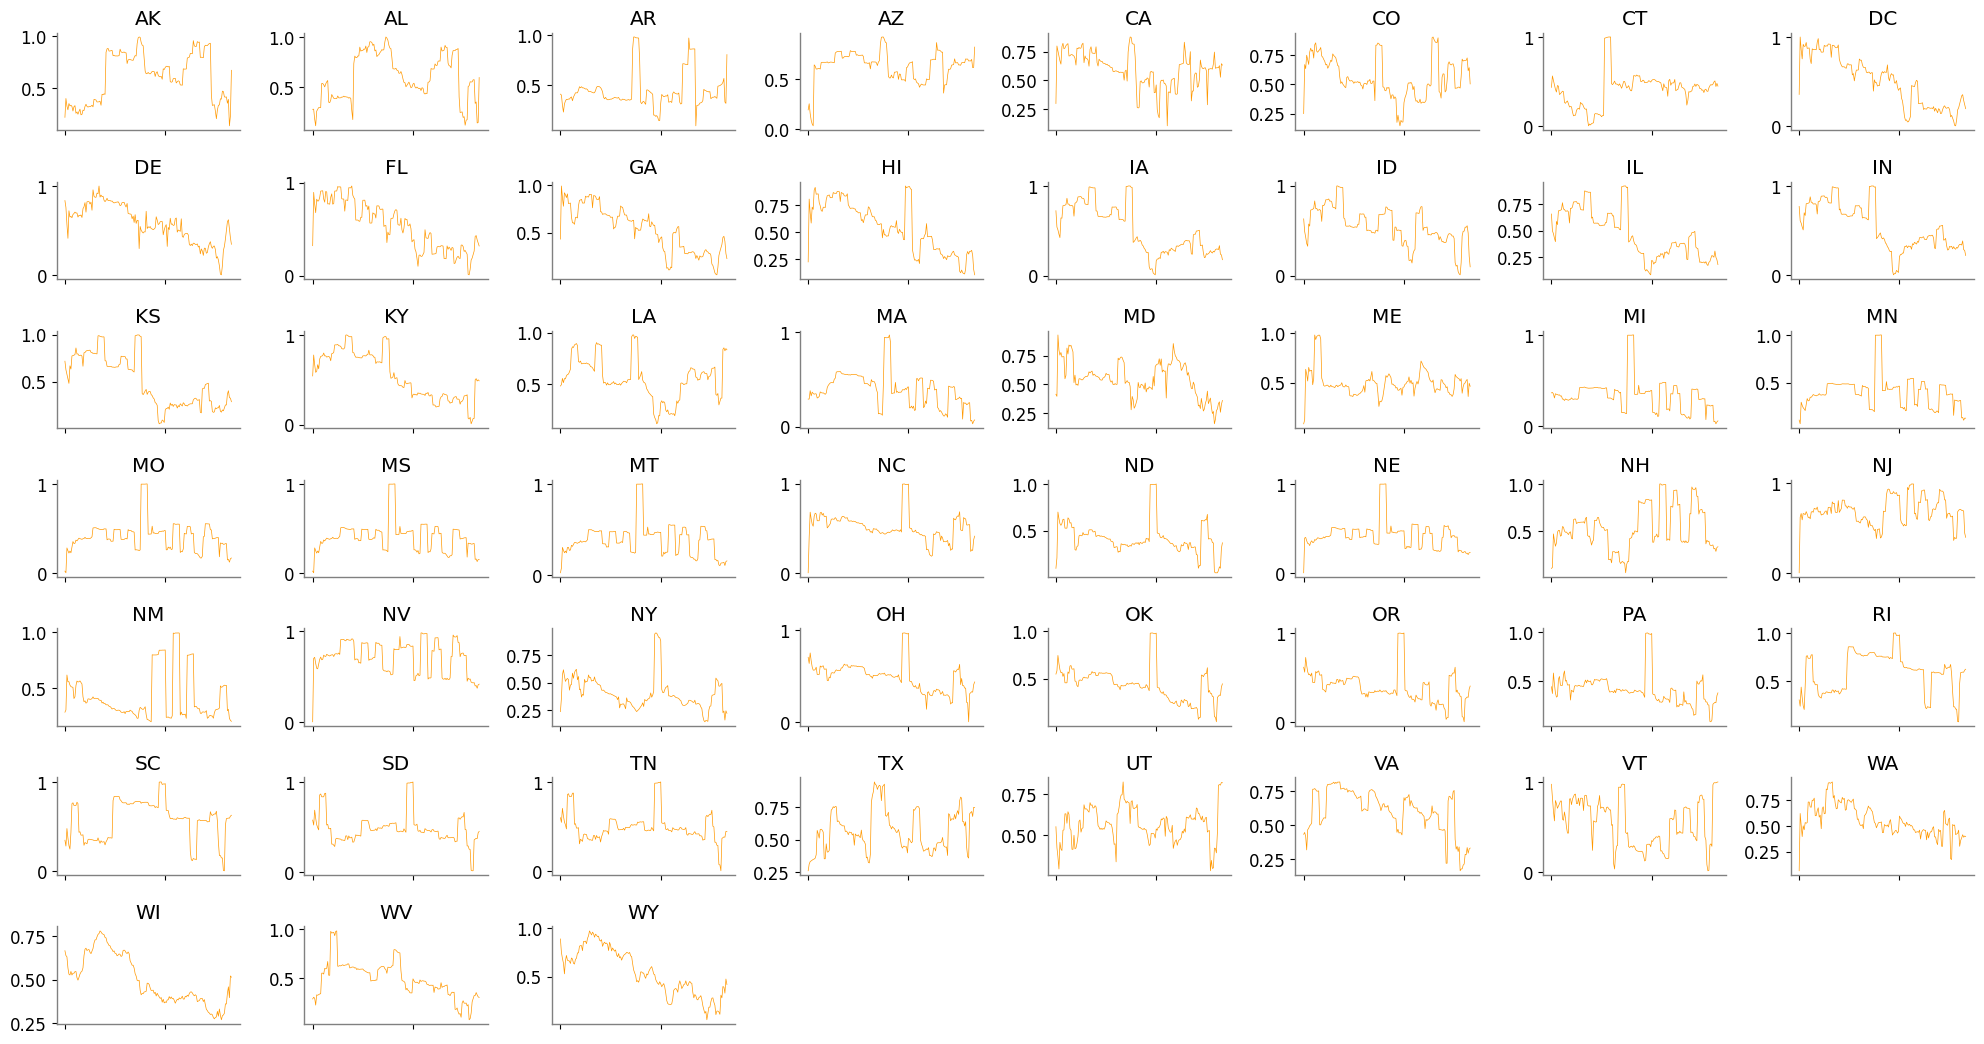

In [115]:
# Process each fold.
for i, f in enumerate(df_folds, start=1):
    dfinfo = DfInfo(f)
    t = process_df(f, display_counties=False)
    t.to_csv(f'fold_{i}.csv')

In [ ]:
g = make_daily(df)
print(g)
f = g[g.columns[4:213]]
e = g[g.columns[-209:]]
f0 = (f == 0).sum().sum()
e0 = (e == 0).sum().sum()
ft = f.size
et = e.size
print(f"Percentage of zeros in first sixth: {f0/ft * 100}%")
print(f"Percentage of zeros in last sixth: {e0/et * 100}%")

      countyFIPS         County Name State  2020-08-20  2020-08-21  \
0           1001     Autauga County     AL           0           0   
1           1003     Baldwin County     AL          33          19   
2           1005     Barbour County     AL           7           0   
3           1007        Bibb County     AL           4           2   
4           1009      Blount County     AL          28           6   
...          ...                 ...   ...         ...         ...   
3137       56037  Sweetwater County     WY           0           3   
3138       56039       Teton County     WY           4           1   
3139       56041       Uinta County     WY           0           0   
3140       56043    Washakie County     WY           2           0   
3141       56045      Weston County     WY           0           0   

      2020-08-22  2020-08-23  2020-08-24  2020-08-25  2020-08-26  ...  \
0             29           2          27           4          11  ...   
1            

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0

/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')



Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


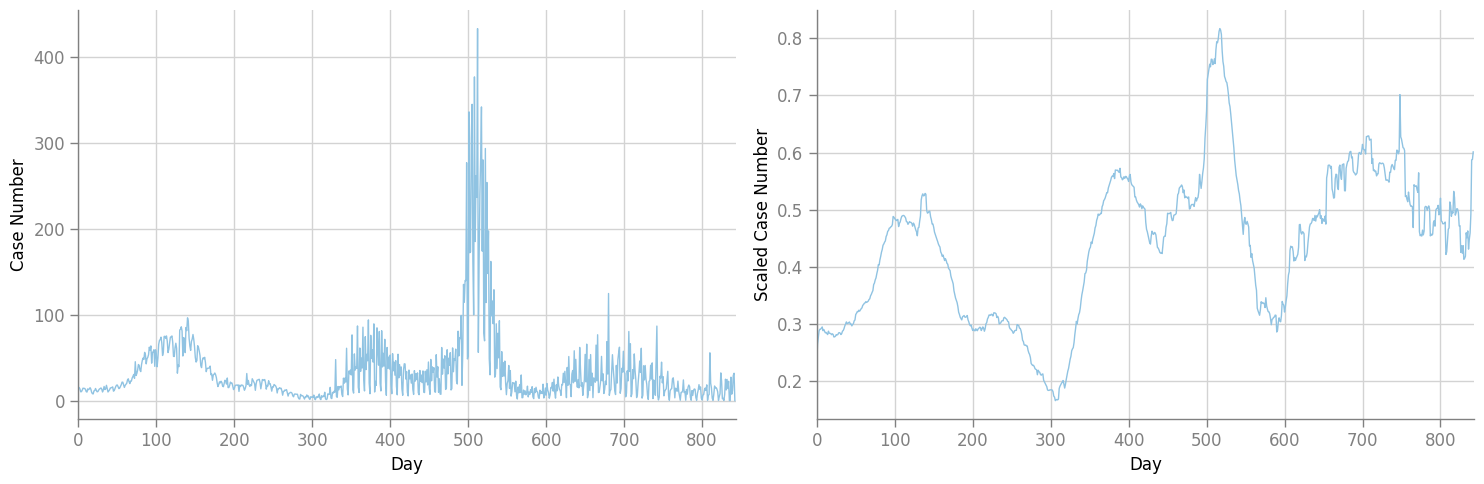

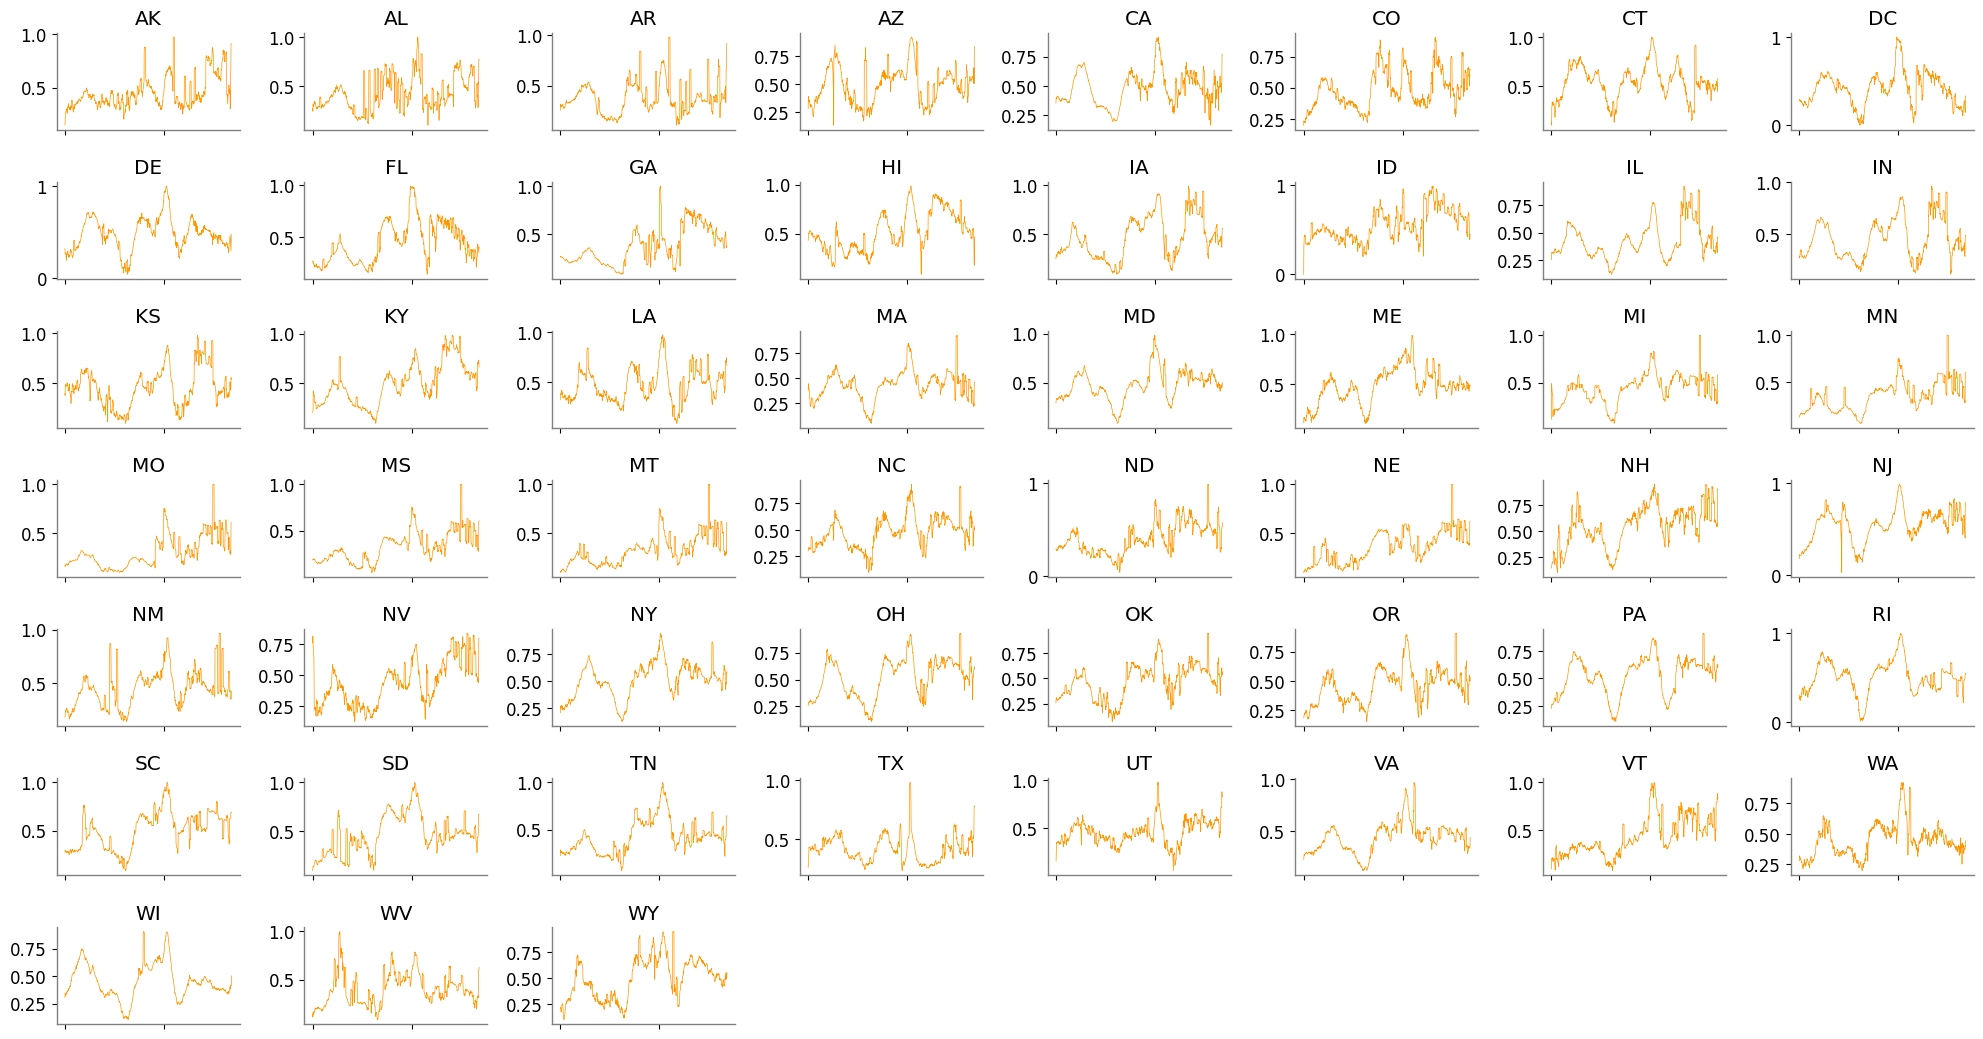

Number of zeros in df: 6358


In [ ]:
dfinfo = DfInfo(df)
#scaled_df = process_df(df, display_counties=True) # ~10 minute runtime to plot all 3000 counties!
scaled_df = process_df(df, display_counties=False) 
print(f"Number of zeros in df: {(scaled_df == 0).sum().sum()}")

In [61]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(series, significance_level=0.05):
    """
    Performs the Augmented Dickey-Fuller (ADF) test on a time series.

    Args:
        series (pd.Series): The time series data.
        significance_level (float, optional): The significance level for
                                             rejecting the null hypothesis.
                                             Defaults to 0.05.

    Returns:
        dict: A dictionary containing the ADF test results:
            - 'adf_statistic': The test statistic.
            - 'p_value': The p-value of the test.
            - 'critical_values': The critical values at different
                                 significance levels.
            - 'number_of_lags_used': The number of lags used.
            - 'number_of_observations_used': The number of observations used.
            - 'is_stationary': True if the time series is likely stationary
                               based on the significance level, False otherwise.
    """
    result = adfuller(series)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    number_of_lags_used = result[2]
    number_of_observations_used = result[3]

    is_stationary = p_value < significance_level

    print("Augmented Dickey-Fuller Test:")
    print(f"  ADF Statistic: {adf_statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print("  Critical Values:")
    for key, value in critical_values.items():
        print(f"    {key}: {value:.4f}")
    print(f"  Number of Lags Used: {number_of_lags_used}")
    print(f"  Number of Observations Used: {number_of_observations_used}")
    print(f"  Is the time series likely stationary (at alpha={significance_level})? {is_stationary}")

    return {
        'adf_statistic': adf_statistic,
        'p_value': p_value,
        'critical_values': critical_values,
        'number_of_lags_used': number_of_lags_used,
        'number_of_observations_used': number_of_observations_used,
        'is_stationary': is_stationary
    }

augmented_dickey_fuller_test(scaled_df[scaled_df.columns[4:]].mean(axis=0))

Augmented Dickey-Fuller Test:
  ADF Statistic: -2.4867
  p-value: 0.1187
  Critical Values:
    1%: -3.4383
    5%: -2.8651
    10%: -2.5687
  Number of Lags Used: 21
  Number of Observations Used: 820
  Is the time series likely stationary (at alpha=0.05)? False


{'adf_statistic': np.float64(-2.486741034441069),
 'p_value': np.float64(0.11873379428458386),
 'critical_values': {'1%': np.float64(-3.4383498644698274),
  '5%': np.float64(-2.865071125564052),
  '10%': np.float64(-2.568650275133849)},
 'number_of_lags_used': 21,
 'number_of_observations_used': 820,
 'is_stationary': np.False_}

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


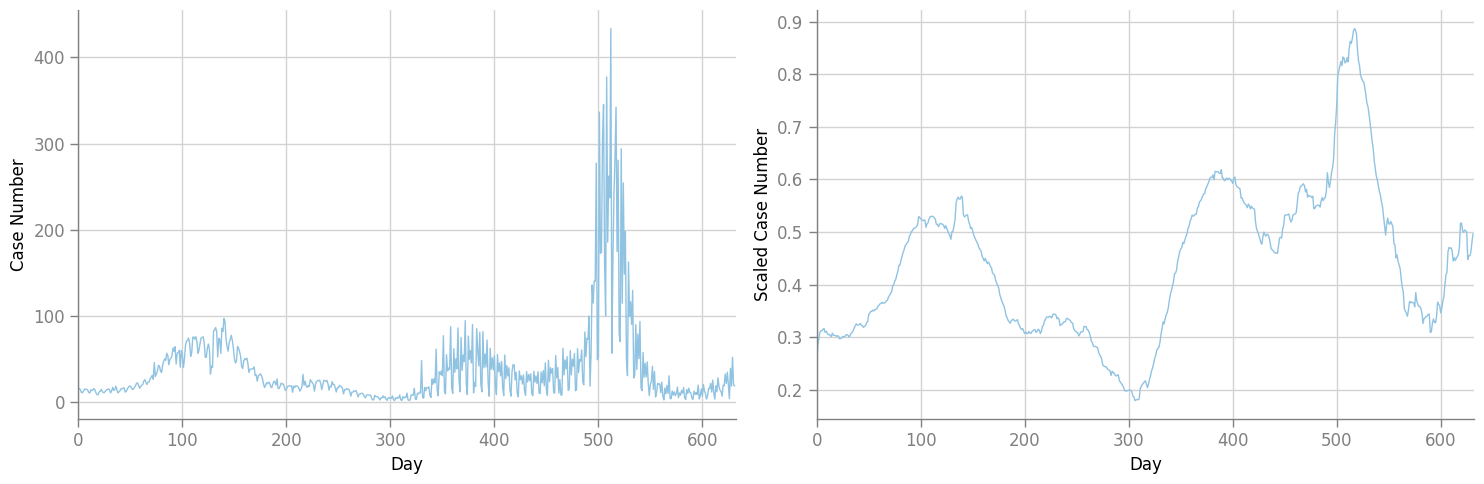

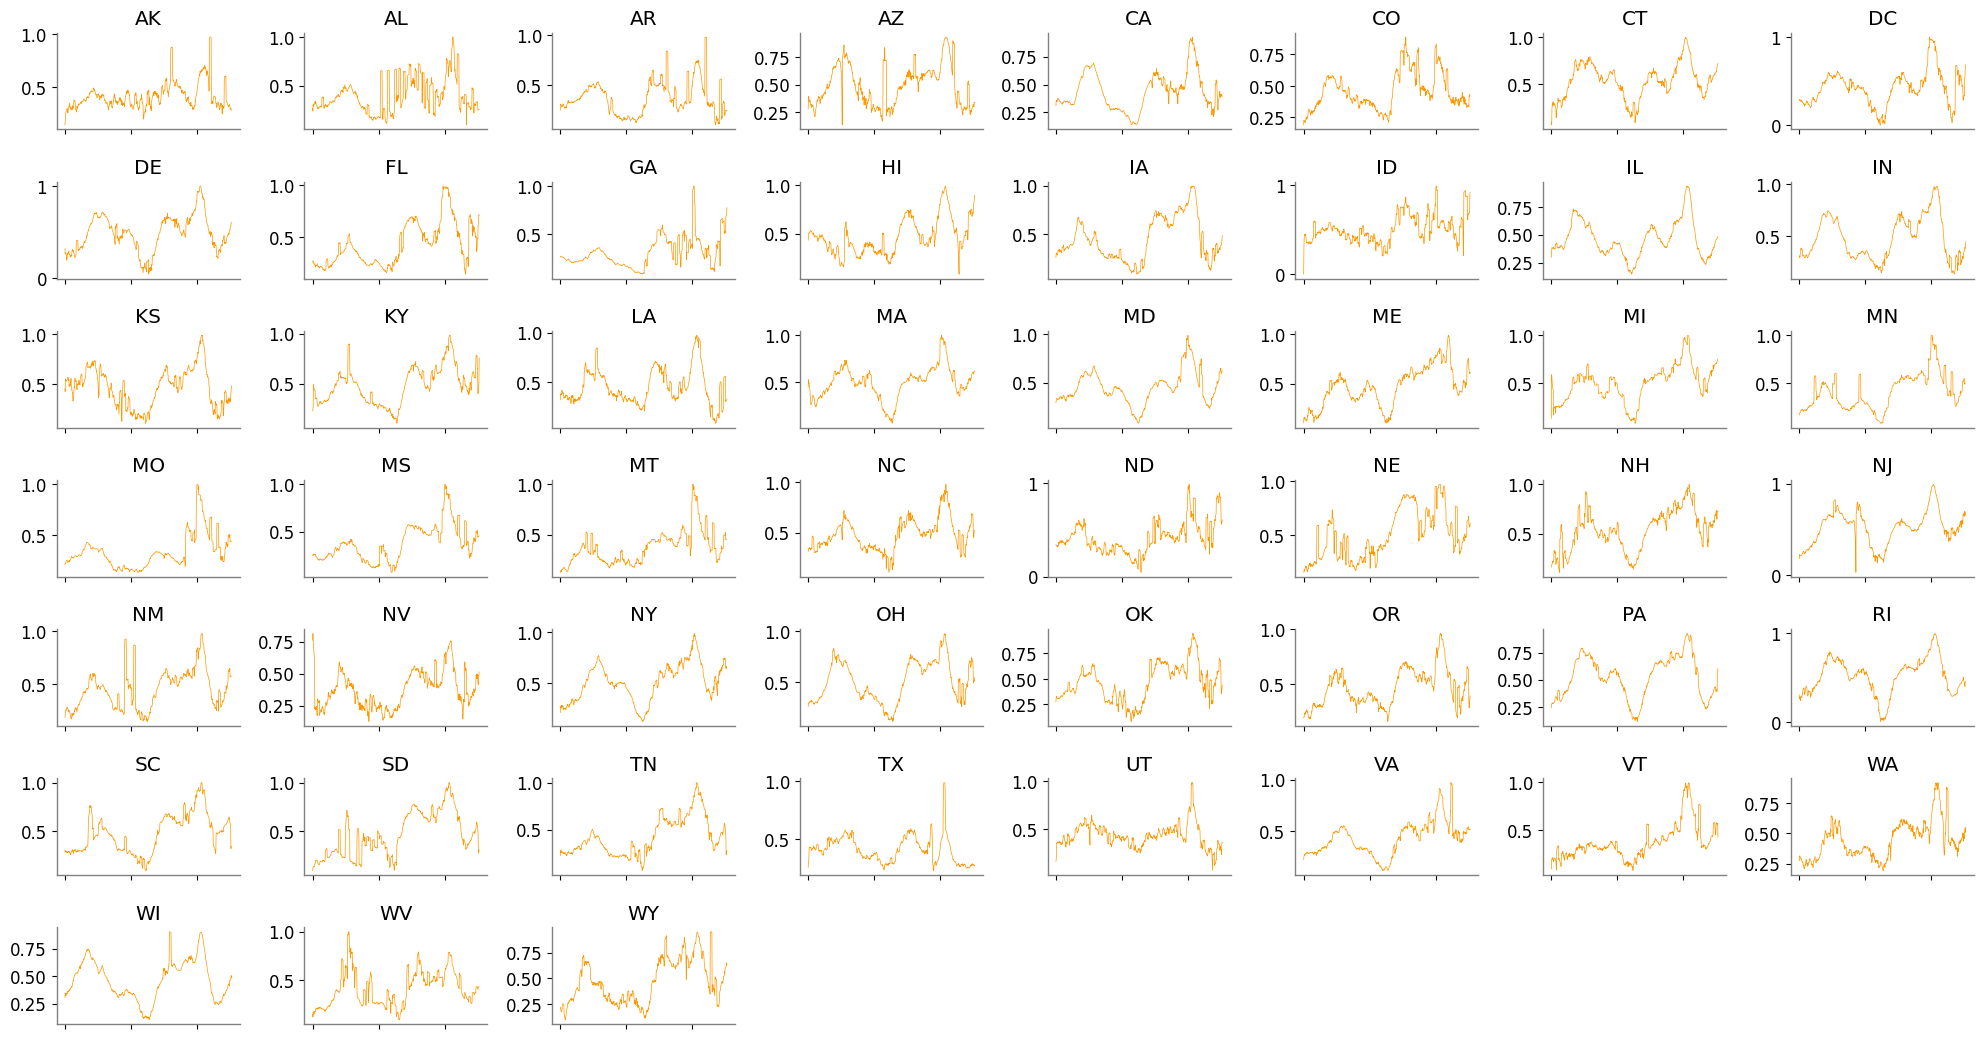

Length before dropping per state: 3142
Length after dropping per state: 3142
Number of zeros in df: 6328


In [ ]:
dfinfo = DfInfo(dftrain)
dftrain_scaled = process_df(dftrain, train=True)
print(f"Length before dropping per state: {len(dftrain_scaled)}")
dftrain_scaled = dftrain_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftrain_scaled)}")
#dftrain_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TRAIN_SCALED.csv')
dftrain_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/NORA_TRAIN_SCALED.csv')
print(f"Number of zeros in df: {(dftrain_scaled == 0).sum().sum()}")

In [ ]:
augmented_dickey_fuller_test(dftrain_scaled[dftrain_scaled.columns[4:]].mean(axis=0))

Augmented Dickey-Fuller Test:
  ADF Statistic: -2.6196
  p-value: 0.0890
  Critical Values:
    1%: -3.4411
    5%: -2.8663
    10%: -2.5693
  Number of Lags Used: 20
  Number of Observations Used: 610
  Is the time series likely stationary (at alpha=0.05)? False


{'adf_statistic': np.float64(-2.6196033797255853),
 'p_value': np.float64(0.08901295382031327),
 'critical_values': {'1%': np.float64(-3.441115625417986),
  '5%': np.float64(-2.866289751785392),
  '10%': np.float64(-2.56929951625907)},
 'number_of_lags_used': 20,
 'number_of_observations_used': 610,
 'is_stationary': np.False_}

In [64]:
# Remove training data for: NE.
# print(dftrain.isnull().sum().sum())
# dftrain = dftrain[dftrain['State'] != 'NE']
# print(dftrain.isnull().sum().sum())
# dfinfo = DfInfo(dftrain)
# dftrain_scaled2 = process_df(dftrain, train=True)
# print(f"Length before dropping per state: {len(dftrain_scaled2)}")
# dftrain_scaled2 = dftrain_scaled2.dropna(axis=0)
# print(f"Length after dropping per state: {len(dftrain_scaled2)}")
# dftrain_scaled2.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TRAIN_SCALED.csv')

# nan_rows = dftrain_scaled2.isna().sum().sum()
# print("Rows with NaNs after setting zeros to NaN:", nan_rows)
# print(f"Number of zeros in df: {(dftrain_scaled == 0).sum().sum()}")

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


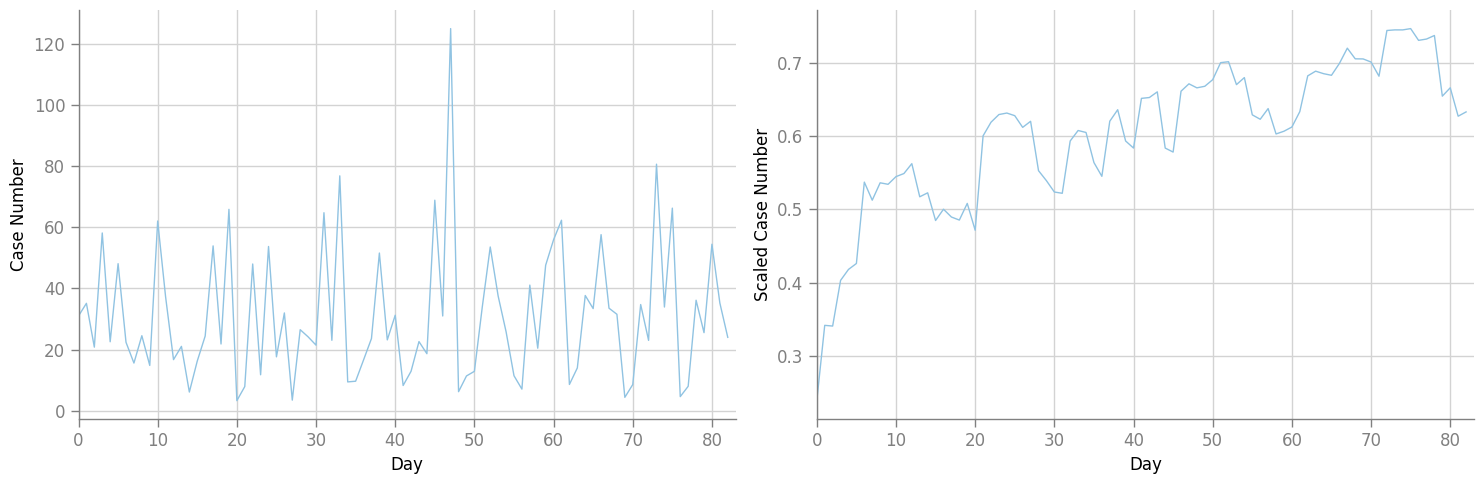

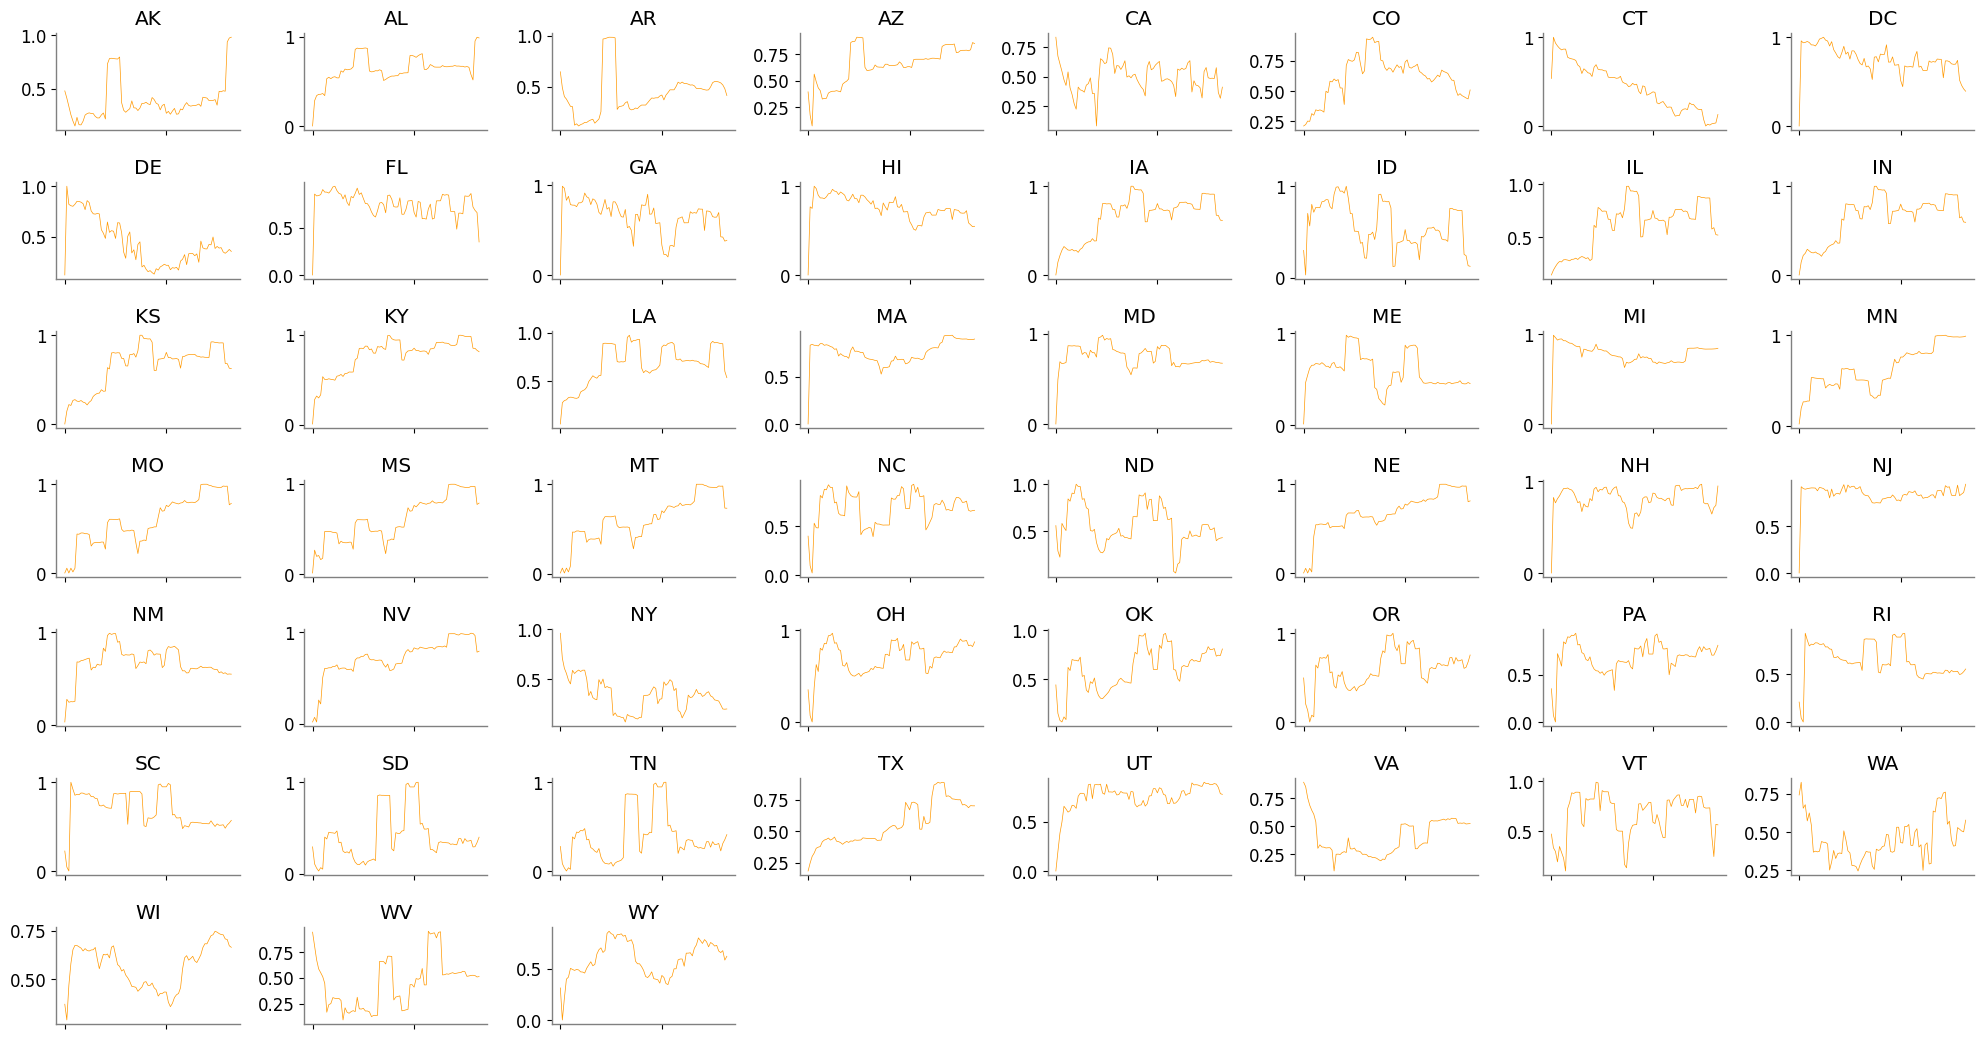

Length before dropping per state: 3142
Length after dropping per state: 3142
Number of zeros in df: 3801


In [65]:
dfinfo = DfInfo(dfval)
dfval_scaled = process_df(dfval)
print(f"Length before dropping per state: {len(dfval_scaled)}")
dfval_scaled = dfval_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dfval_scaled)}")
#dfval_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/VAL_SCALED.csv')
dfval_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/NORA_VAL_SCALED.csv')

print(f"Number of zeros in df: {(dfval_scaled == 0).sum().sum()}")

In [66]:
augmented_dickey_fuller_test(dfval_scaled[dfval_scaled.columns[4:]].mean(axis=0))

Augmented Dickey-Fuller Test:
  ADF Statistic: -1.9308
  p-value: 0.3177
  Critical Values:
    1%: -3.5220
    5%: -2.9015
    10%: -2.5881
  Number of Lags Used: 7
  Number of Observations Used: 74
  Is the time series likely stationary (at alpha=0.05)? False


{'adf_statistic': np.float64(-1.9307910245230229),
 'p_value': np.float64(0.3177175246432743),
 'critical_values': {'1%': np.float64(-3.5219803175527606),
  '5%': np.float64(-2.9014701097664504),
  '10%': np.float64(-2.58807215485756)},
 'number_of_lags_used': 7,
 'number_of_observations_used': 74,
 'is_stationary': np.False_}

In [67]:
# Remove validation for states: CT, FL, IL, IN, MO, NE, OR, SC, TN.
# drop = ['CT', 'FL', 'IL', 'ID', 'IN', 'MO', 'NE', 'OR', 'SC', 'TN']
# dfval = dfval[~dfval['State'].isin(drop)]
# dfval_scaled = process_df(dfval)
# print(f"Length before dropping per state: {len(dfval_scaled)}")
# dfval_scaled = dfval_scaled.dropna(axis=0)
# print(f"Length after dropping per state: {len(dfval_scaled)}")
# dfval_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/VAL_SCALED.csv')
# print(dfval_scaled.isna().sum().sum())
# print(f"Number of zeros in df: {(dfval_scaled == 0).sum().sum()}")

zero count 0.0
initial nan count: 0
Nans after daily : 0
Nans before rolling average daily : 0
Nans after rolling average : 0
Nans after interpolation : 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')
/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_39001/1647620842.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].fillna(method='ffill').fillna(method='bfill')


Final nan count: 0


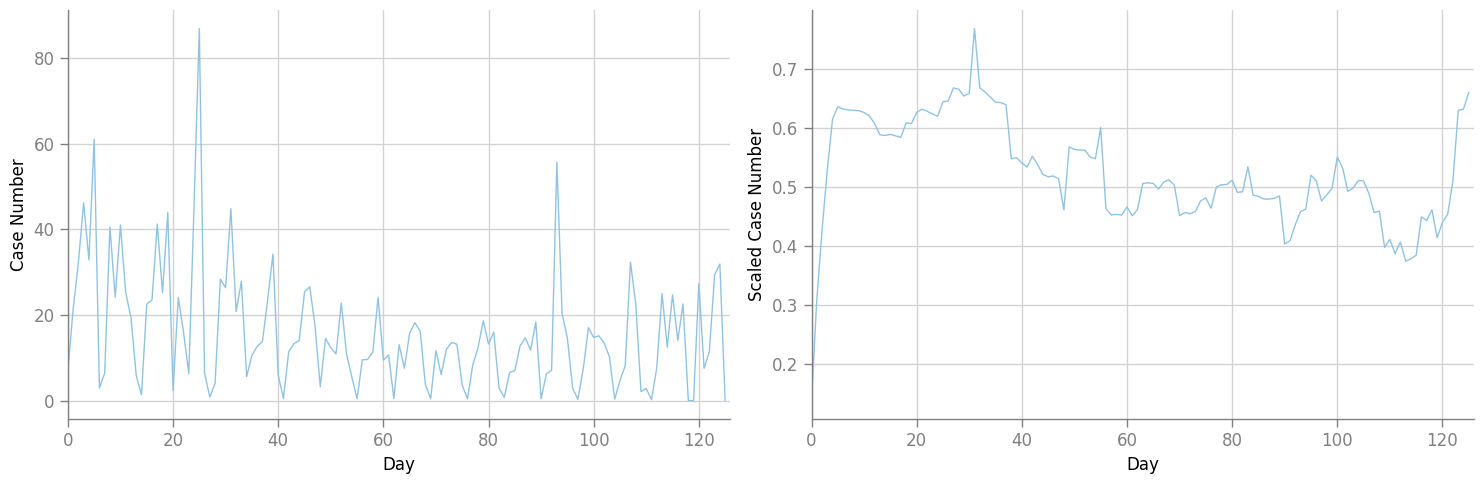

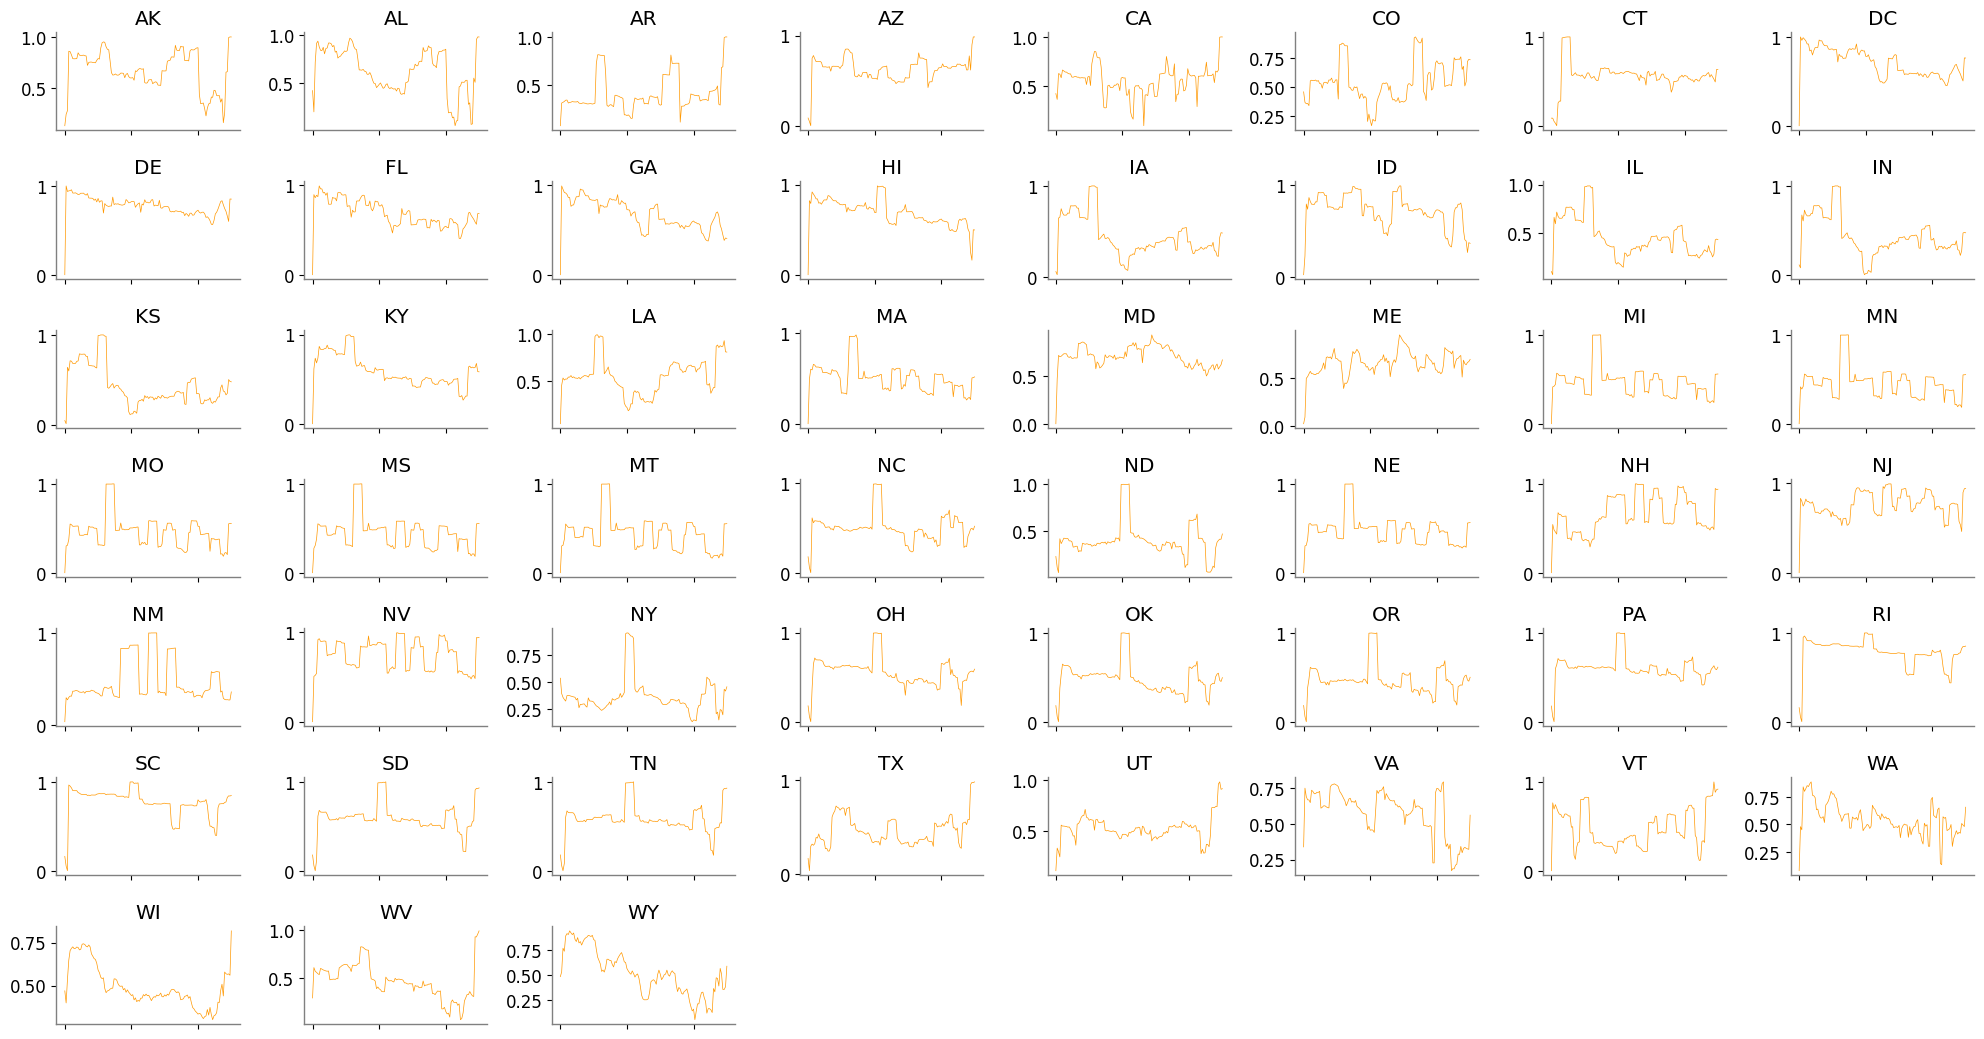

Length before dropping per state: 3142
Length after dropping per state: 3142


In [68]:
dfinfo = DfInfo(dftest)
dftest_scaled = process_df(dftest)
print(f"Length before dropping per state: {len(dftest_scaled)}")
dftest_scaled = dftest_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftest_scaled)}")
#dftest_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TEST_SCALED.csv')
dftest_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/NORA_TEST_SCALED.csv')

In [69]:
augmented_dickey_fuller_test(dftest_scaled[dftest_scaled.columns[4:]].mean(axis=0))

Augmented Dickey-Fuller Test:
  ADF Statistic: -1.9515
  p-value: 0.3083
  Critical Values:
    1%: -3.4875
    5%: -2.8866
    10%: -2.5801
  Number of Lags Used: 7
  Number of Observations Used: 117
  Is the time series likely stationary (at alpha=0.05)? False


{'adf_statistic': np.float64(-1.9514650339423096),
 'p_value': np.float64(0.3082507353118045),
 'critical_values': {'1%': np.float64(-3.487517288664615),
  '5%': np.float64(-2.8865777180380032),
  '10%': np.float64(-2.5801239192052012)},
 'number_of_lags_used': 7,
 'number_of_observations_used': 117,
 'is_stationary': np.False_}

In [70]:
# Remove test data for: DC, FL, GA, IN, LA, MD, MN, MO, NE, KS, OR, SC, TN.
# drop = ['DC', 'FL', 'GA', 'IN', 'LA', 'MD', 'MN', 'MO', 'NE', 'KS', 'OR', 'SC', 'TN']
# dftest = dftest[~dftest['State'].isin(drop)]
# dfinfo = DfInfo(dftest)
# dftest_scaled = process_df(dftest)
# print(f"Length before dropping per state: {len(dftest_scaled)}")
# dftest_scaled = dftest_scaled.dropna(axis=0)
# print(f"Length after dropping per state: {len(dftest_scaled)}")
# dftest_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TEST_SCALED.csv')
# print(dftest_scaled.isna().sum().sum())
# print(f"Number of zeros in df: {(dftest_scaled == 0).sum().sum()}")

In [71]:
dftrain_scaled = dftrain_scaled[dftrain_scaled.columns[4:]]
dfval_scaled = dfval_scaled[dfval_scaled.columns[4:]]
dftest_scaled = dftest_scaled[dftest_scaled.columns[4:]]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

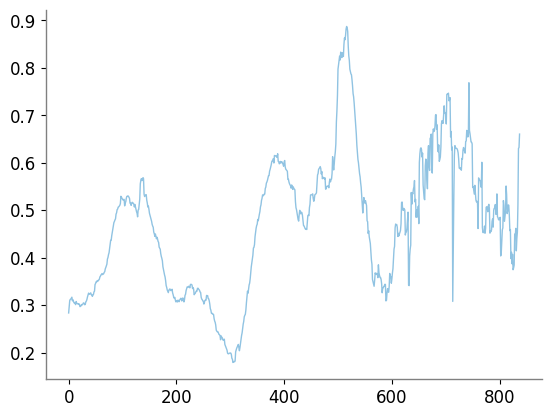

In [72]:
df = pd.concat([dftrain_scaled, dfval_scaled, dftest_scaled], axis=1)
meandf = df.mean(axis=0)
data = meandf.to_numpy()

plt.plot(np.arange(0, data.shape[0], 1), data, color='#90c3e2', linewidth=1)
plt.set_xlabel('Day')
plt.set_ylabel('Scaled Case Number')
plt.grid(True, which='both', linestyle='-', linewidth=1, color='lightgray')
plt.tick_params(direction='out', length=6, width=1, colors='gray')
plt.set_xlim(0, data.shape[0])
plt.show()


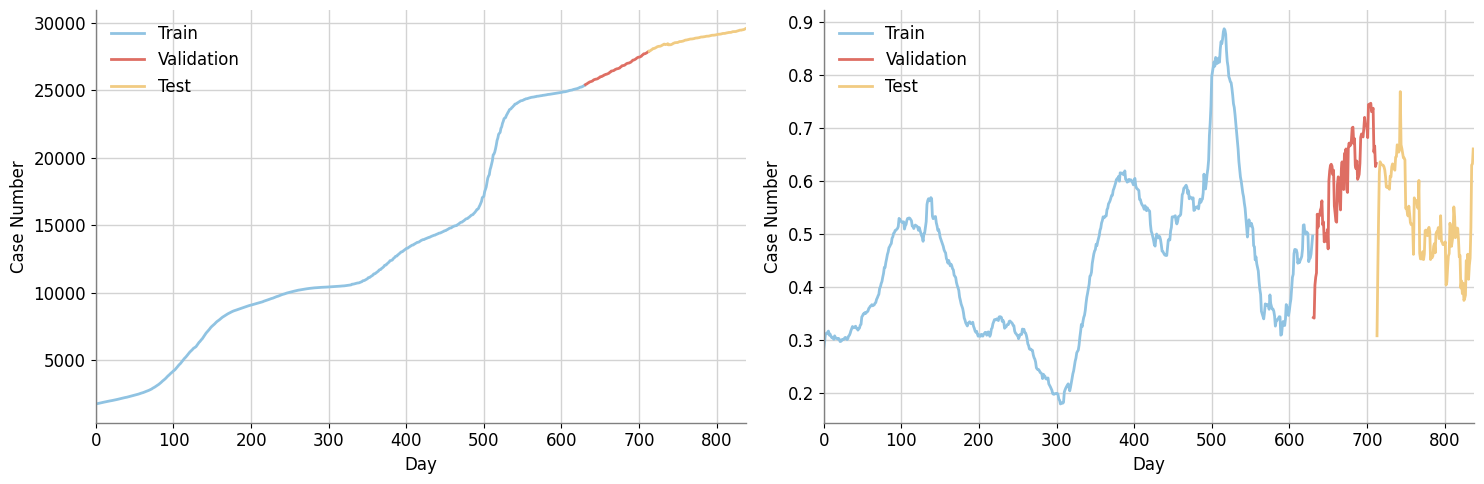

In [ ]:
# Compute per-day mean for each split
unscaled_train_mean = dftrain[dftrain.columns[4:]].mean(axis=0)
unscaled_val_mean = dfval[dfval.columns[4:]].mean(axis=0)
unscaled_test_mean = dftest[dftest.columns[4:]].mean(axis=0)

train_mean = dftrain_scaled.mean(axis=0)   # length N_train :contentReference[oaicite:1]{index=1}  
val_mean   = dfval_scaled.mean(axis=0)     # length N_val  
test_mean  = dftest_scaled.mean(axis=0)    # length N_test  

N_train = train_mean.shape[0]
N_val   = val_mean.shape[0]
N_test  = test_mean.shape[0]

# Create x-coordinates for each segment
x_train = np.arange(0, N_train)
x_val   = np.arange(N_train, N_train + N_val)
x_test  = np.arange(N_train + N_val,
                   N_train + N_val + N_test)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

c = ['#90c3e2', '#de6e63', '#f1cb82']

ax[0].plot(x_train, unscaled_train_mean[:-1],
        color=c[0], label='Train')  

ax[0].plot(x_val, unscaled_val_mean[:-1],
        color=c[1], label='Validation')

ax[0].plot(x_test, unscaled_test_mean[:-1],
        color=c[2], label='Test')

ax[0].set_xlabel('Day')
ax[0].set_ylabel('Case Number')
ax[0].grid(True, which='both', linestyle='-', linewidth=1,
        color='lightgray')                    
ax[0].set_xlim(0, N_train + N_val + N_test)
ax[0].legend()     

ax[1].plot(x_train, train_mean,
        color=c[0], label='Train')  

ax[1].plot(x_val, val_mean,
        color=c[1], label='Validation')

ax[1].plot(x_test, test_mean,
        color=c[2], label='Test')

ax[1].set_xlabel('Day')
ax[1].set_ylabel('Case Number')
ax[1].grid(True, which='both', linestyle='-', linewidth=1,
        color='lightgray')                    
ax[1].set_xlim(0, N_train + N_val + N_test)
ax[1].legend()        


plt.savefig('trvlts.png', dpi=500, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [83]:
print(dftrain_scaled.columns[0], dftrain_scaled.columns[-1])
print(dfval_scaled.columns[0], dfval_scaled.columns[-1])
print(dftest_scaled.columns[0], dftest_scaled.columns[-1])

2020-08-21 2022-05-13
2022-05-16 2022-08-05
2022-08-08 2022-12-10
